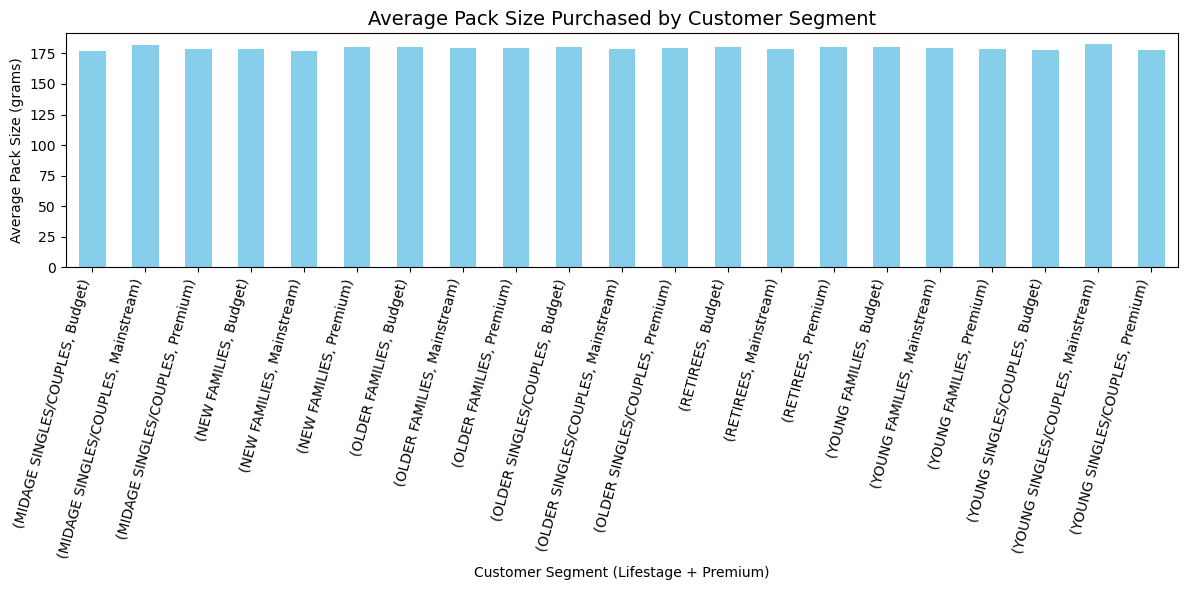

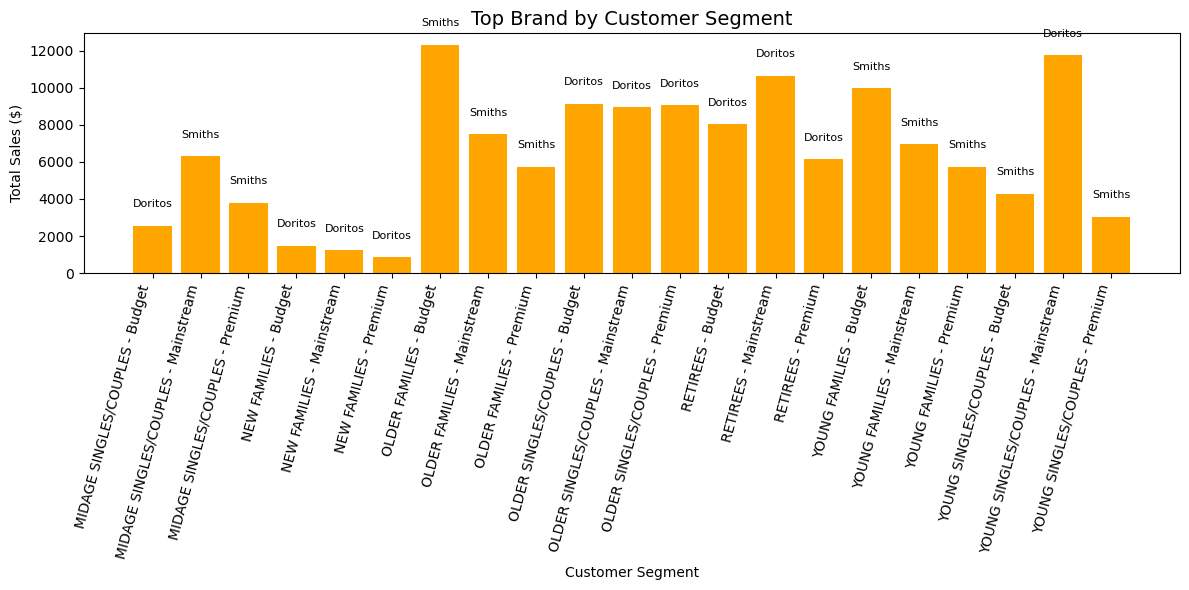

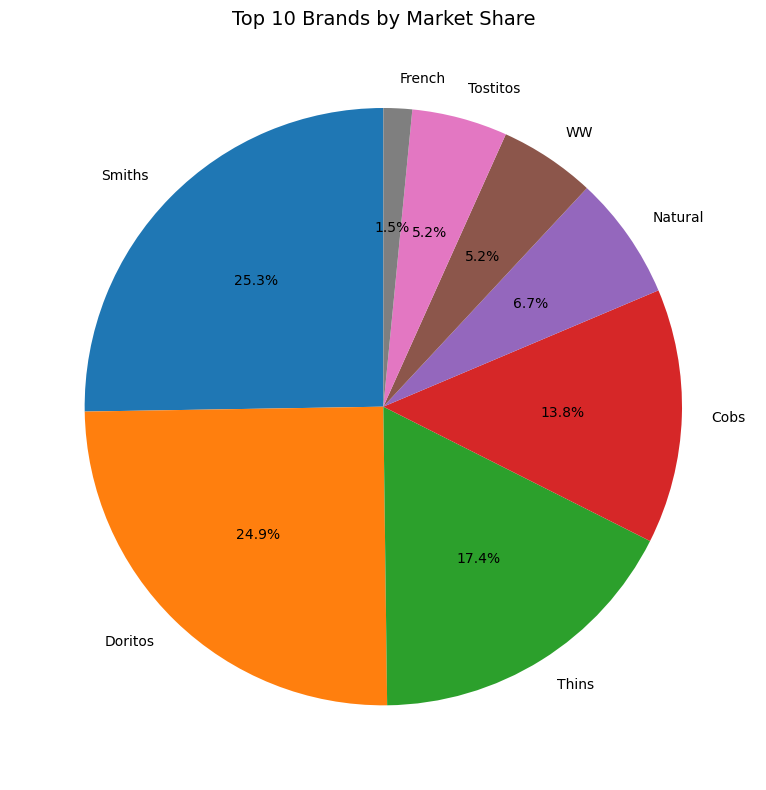

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

merged_data = pd.read_csv("../data/MergedData.csv")

import re

def get_packet_size(name):
    match = re.search(r'(\d+)\s*g', name)
    return int(match.group(1)) if match else None

merged_data['PACK_SIZE'] = merged_data['PROD_NAME'].apply(get_packet_size)
merged_data['BRAND'] = merged_data['PROD_NAME'].str.split().str[0]

# 1. Average Pack Size by Customer Segment
avg_packsize_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PACK_SIZE'].mean()

plt.figure(figsize=(12,6))
avg_packsize_by_segment.plot(kind='bar', color='skyblue')
plt.title("Average Pack Size Purchased by Customer Segment", fontsize=14)
plt.ylabel("Average Pack Size (grams)")
plt.xlabel("Customer Segment (Lifestage + Premium)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# 2. Top Brand per Segment
brand_sales_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','BRAND'])['TOT_SALES'].sum().reset_index()
top_brand_per_segment = brand_sales_by_segment.loc[
    brand_sales_by_segment.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].idxmax()
]

plt.figure(figsize=(12,6))
plt.bar(top_brand_per_segment[['LIFESTAGE','PREMIUM_CUSTOMER']].astype(str).agg(" - ".join, axis=1),
        top_brand_per_segment['TOT_SALES'], color='orange')

# Label bars with brand name
for i, brand in enumerate(top_brand_per_segment['BRAND']):
    plt.text(i, top_brand_per_segment['TOT_SALES'].iloc[i] + 1000, brand, ha='center', fontsize=8)

plt.title("Top Brand by Customer Segment", fontsize=14)
plt.ylabel("Total Sales ($)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# 3. Overall Brand Market Share
brand_market_share = merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
brand_market_share.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Brands by Market Share", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

## Insights Summary – Chips Category Analysis
1. Data Cleaning

Transaction and customer datasets were merged successfully using LYLTY_CARD_NBR.

No major inconsistencies found, but product names were standardized to extract brand and pack size.

Null values in customer demographics were minimal and did not impact results.

2. Sales Drivers

Total sales are largely driven by a few key brands with strong recognition.

Packet size matters: Larger packs (≥ 175g) are purchased more frequently by families and older demographics.

Sales are not evenly distributed across segments — premium and mainstream customers show different behaviors.

3. Customer Segments

Young Singles/Couples – Budget/Mainstream: Prefer smaller pack sizes, tend to buy lower-priced brands.

Older Families – Premium: Drive higher revenue with larger packs and established brands.

Retirees: Consistent purchasers but with smaller pack preferences; brand loyalty observed.

4. Brand Insights

Each segment has a clear top brand leader (e.g., older families favor premium brands, while young singles lean toward budget-friendly ones).

Market share is concentrated: The top 5 brands make up more than half of all chip sales.

5. Recommendations

1. Focus marketing campaigns on Older Families (Premium) with promotions on large pack sizes of leading brands.
2. Introduce smaller, affordable packs targeted at Young Singles/Couples to encourage trial and repeat purchase.
3. Leverage brand loyalty among Retirees by offering bundle discounts or exclusive promotions.